# Student ID: 20B030297
# Student Name: Alikhan Zhamankhan

# Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
Whole weight / continuous / grams / whole abalone<br>
Shucked weight / continuous / grams / weight of meat<br>
Viscera weight / continuous / grams / gut weight (after bleeding)<br>
Shell weight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years<br>

# Rings = target value
# Description:
The Abalone Problem

The age of an Abalone can be found by counting the number of rings on its cutted shell. In the Abalone Dataset, there are age measurements of Abalones, along with some physical measurements.



## Import need libraries and data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
abalone = pd.read_csv('abalone.csv')

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
col = list(abalone.columns)

In [5]:
col = list(map(str.lower, col))

In [6]:
abalone.columns = col

In [7]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole weight    4177 non-null   float64
 5   shucked weight  4177 non-null   float64
 6   viscera weight  4177 non-null   float64
 7   shell weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
abalone.isna().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

<AxesSubplot:>

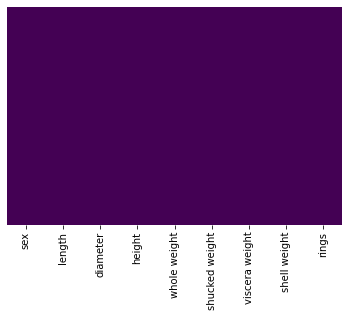

In [10]:
sns.heatmap(abalone.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
abalone.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
abalone[abalone['height'] == 0]

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [13]:
abalone.drop(index=abalone[abalone['height'] == 0].index, inplace=True)

### I decided to drop, because declare mean of height is irrelevant. Abalone will not have proportial physical measurements. For instance: weight is 500 g, length is 600 mm but if mean of height is 300, then this abalone will be mutant or not healty or something else. It's physical measurement must be more or less proportial like other living beings

In [14]:
abalone[abalone['height'] == 0]

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings


In [15]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
sns.set_style('whitegrid')

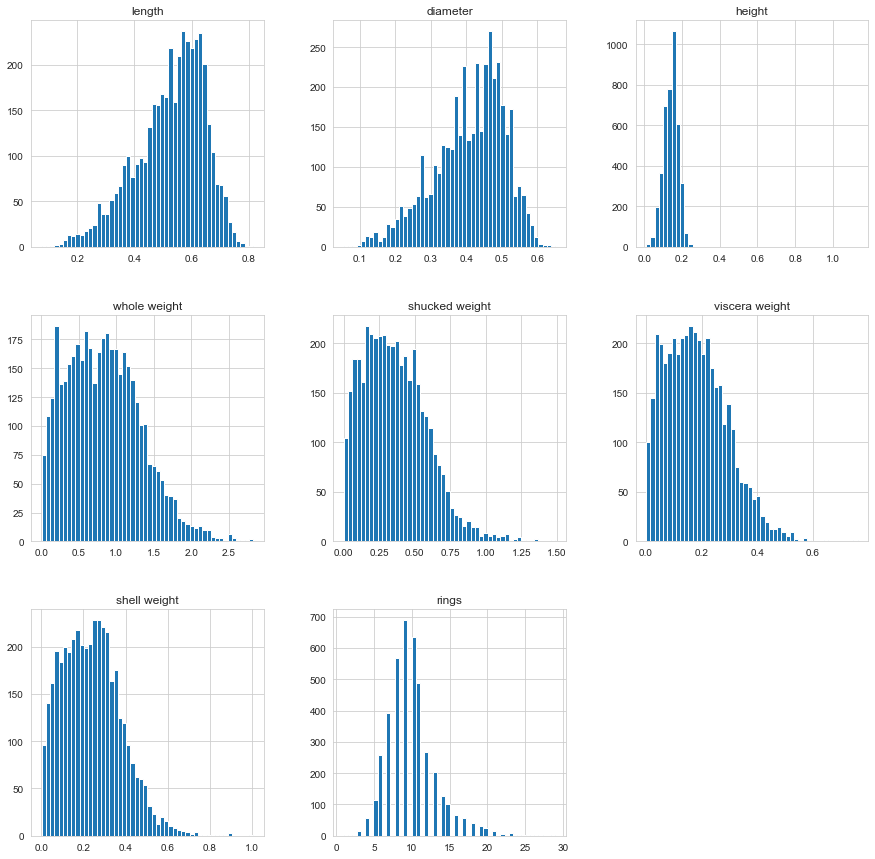

In [17]:
abalone.hist(bins=50, figsize=(15, 15));

### Looks like some features have skewness,  let's check it

In [18]:
abalone.skew().sort_values(ascending=False)

C:\Users\aliha\AppData\Local\Temp/ipykernel_20872/1672267768.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  abalone.skew().sort_values(ascending=False)


height            3.166364
rings             1.113754
shucked weight    0.718735
shell weight      0.621081
viscera weight    0.591455
whole weight      0.530549
diameter         -0.610182
length           -0.640993
dtype: float64

## As you can see there is skewness in height. There is two way to handle it, because height is positive value, we can sqrt it, or find outliers and delete them. In that case I squared height.

In [19]:
abalone['height'] = np.sqrt(abalone['height'])

<AxesSubplot:>

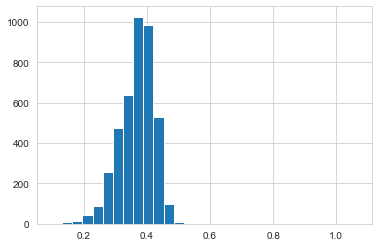

In [20]:
abalone['height'].hist(bins=30)

In [21]:
abalone.skew().sort_values(ascending=False)

C:\Users\aliha\AppData\Local\Temp/ipykernel_20872/1672267768.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  abalone.skew().sort_values(ascending=False)


rings             1.113754
shucked weight    0.718735
shell weight      0.621081
viscera weight    0.591455
whole weight      0.530549
height           -0.176012
diameter         -0.610182
length           -0.640993
dtype: float64

# !!! From this part almost everything is changed

## Data Analysis

In [22]:
abalone['rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     258
7     391
8     567
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: rings, dtype: int64

## There is no rings with 28, and min value = 1,  max value = 29. 

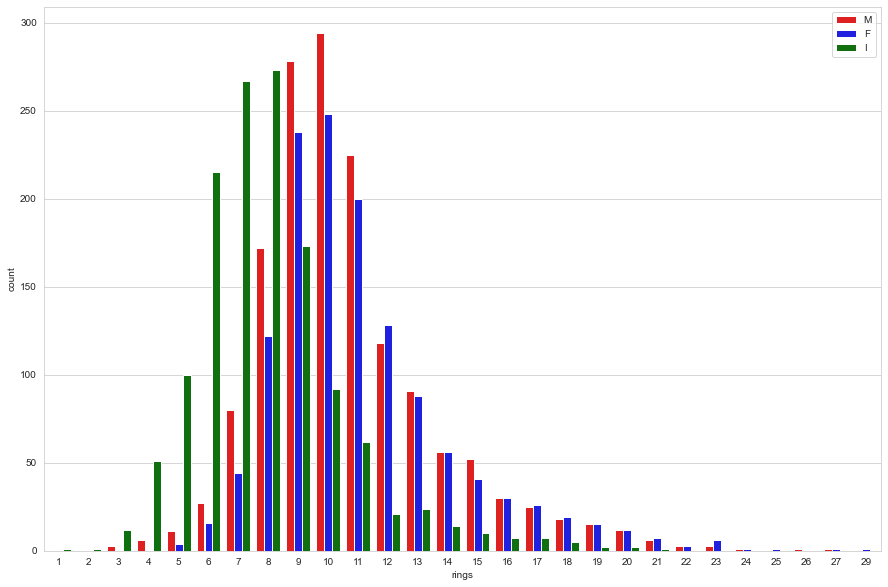

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(data=abalone, x='rings', hue='sex', palette=['red', 'blue', 'green']);
plt.legend(loc='upper right')

## Most of the rings of male and female between 8-13, but infant rings between 5-10. I'll clarify it in another plot below

<Figure size 1440x1440 with 0 Axes>

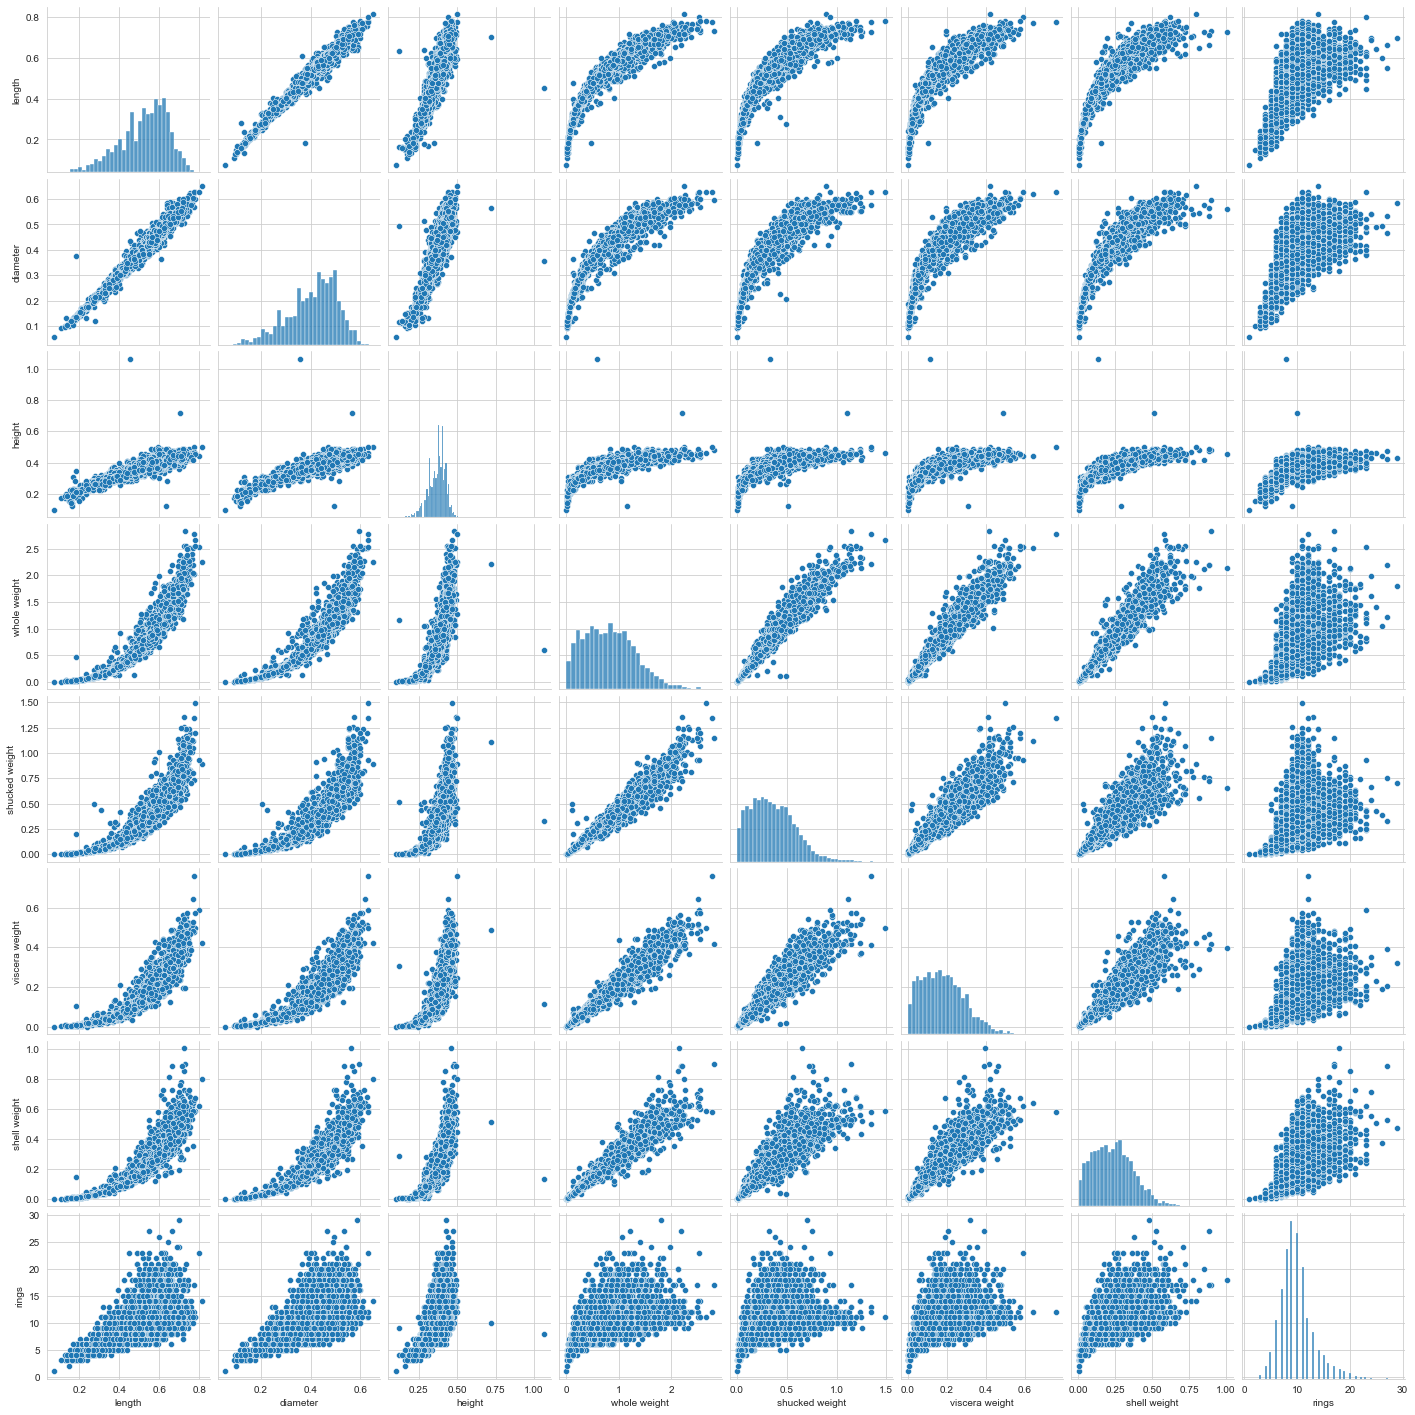

<Figure size 1440x1440 with 0 Axes>

In [24]:
sns.pairplot(abalone, diag_kind='hist');
plt.figure(figsize=(20,20))

### It seems there is correlation between features, I'll check it further

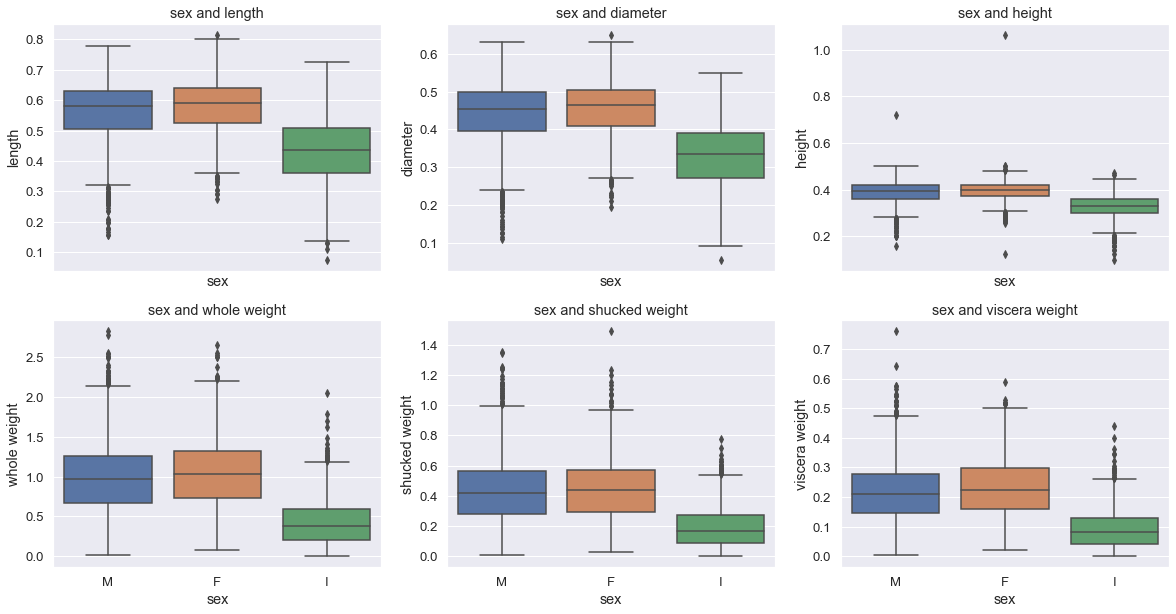

In [25]:
sns.set(font_scale=1.2)
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,10))
k = 0
temp = col[1:- 1]
for i in range(2):
    for j in range(3):
        sns.boxplot(data=abalone, x='sex',y=temp[k], ax=axes[i][j])
        axes[i][j].set_title("sex and " + temp[k])
        k += 1


## Observation: Male and female almost identical, only infant have distinguish features

# Correlation matrix

<AxesSubplot:>

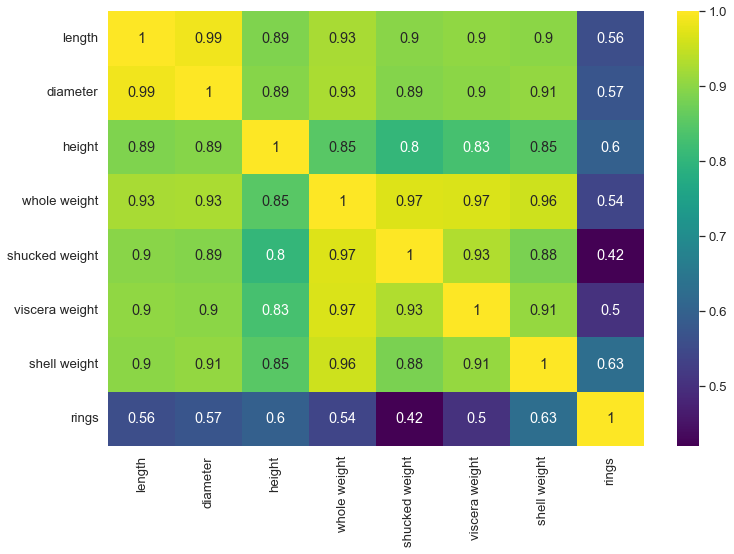

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(abalone.corr(), cmap='viridis', annot=True)

The heat map shows that features are highly correlated and multicollinearity is possible.

-Whole weight is almost linearly correlated with all the features except Rings

-Length is linearly correlated with Diameter

-From all the features excluding Rings, Height is least correlated with other features

-Rings feature has the highest correlation with Shell Weight followed by Height, Length and Diameter

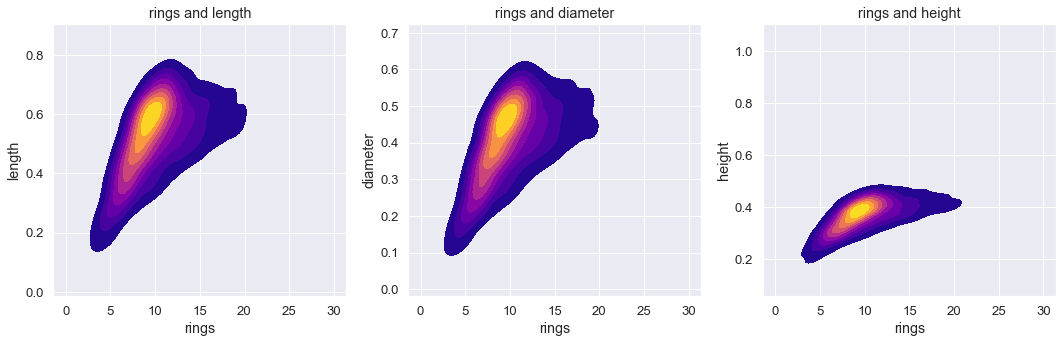

In [27]:
sns.set(font_scale=1.2)
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
temp = list(abalone.columns)[1:-2]
for i in range(3):
    sns.kdeplot(data=abalone, x='rings', y=temp[i], shade=True, cmap='plasma', ax=axes[i])
    axes[i].set_title("rings and " + temp[i])
    plt.tight_layout()

### Observation: We can see that most datas concentrate in age 10, that is there is a lot of abalones with length around 0.6 and age 10, diameter and height also similar properties

# Categorical Feature


Finally, I will analyse the relation of Rings with the Sex feature


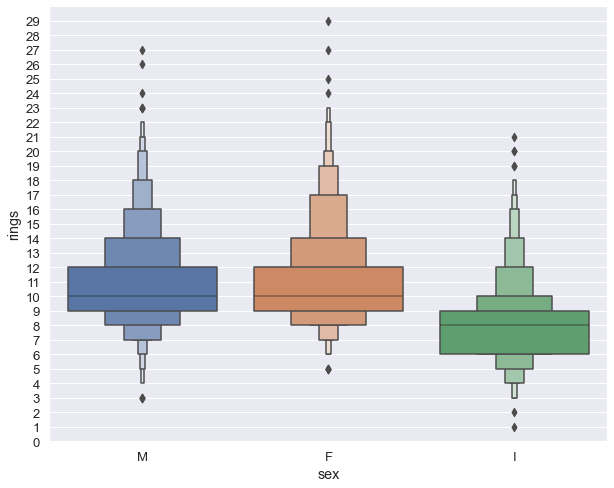

In [28]:
data = pd.concat([abalone['rings'], abalone['sex']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxenplot(x='sex', y="rings", data=abalone)
fig.axis(ymin=0, ymax=30);
plt.yticks(np.arange(0, 30, 1.0));


## !!! Observation

-Distribution between Male and Female is similar

-Most of the Rings both for Male and Female are between 8 and 14 *(I assumed 8-13 above)

-Infants have mostly from 5 to 10 Rings *(I assumed right above in distribution plot)

### This observation I'll use to split into 3 categories by age: young, middle, and old. Exactly, 0-8 young, 9-10 middle, 11 - 29 old.
Because infant has small ages, male and female have big, so (8, 10] is intersection between male and female and infant ages, it means between this age, i.e. 9-10 age bot old and not young, it's age of middle

In [29]:
abalone['sex'].replace(['M', 'F', 'I'], [0,1,2], inplace = True)

In [30]:
abalone

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960,10


just replaced categorize feature sex to numerical

In [31]:
bins = [0,8,10,29]
group_names = ['young','medium','old']
abalone['rings'] = pd.cut(abalone['rings'],bins, labels = group_names)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
I used this function to split by ages

In [32]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.150,old
1,0,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.070,young
2,1,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.210,medium
3,0,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.155,medium
4,2,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.055,young


In [33]:
dictionary = {'young':0, 'medium':1, 'old':2}
abalone['rings'] = abalone['rings'].map(dictionary)


In [34]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.150,2
1,0,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.070,0
2,1,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.210,1
3,0,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.155,1
4,2,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.055,0


## Train Test Split and Evaluation of models

In [35]:
X = abalone.drop('rings', axis=1)
y = abalone['rings']

In [155]:
from sklearn.model_selection import train_test_split


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [159]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier(), 
               "RandomForest": RandomForestClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(classifier.score(X_test, y_test)*100), "% accuracy score")
    

Classifiers:  LogisticRegression Has a training score of 67 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 60 % accuracy score
Classifiers:  SVC Has a training score of 67 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 58 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 66 % accuracy score


# Finding the best hyperparameters of models

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


## SVC

In [48]:
svc_param_grid = [{
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['linear']
                  },
                 {
                    'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                    'svc__kernel': ['rbf']
                 }
]

## I added standardscaler to pipeline to standardize the data values into a standard format.

In [165]:

svc_clf = make_pipeline(StandardScaler(), SVC(random_state=1))



In [166]:
svc_grid = GridSearchCV(estimator=svc_clf, param_grid=svc_param_grid, verbose=3)

In [167]:
svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END ..svc__C=0.001, svc__kernel=linear;, score=0.568 total time=   0.1s
[CV 2/5] END ..svc__C=0.001, svc__kernel=linear;, score=0.590 total time=   0.1s
[CV 3/5] END ..svc__C=0.001, svc__kernel=linear;, score=0.574 total time=   0.1s
[CV 4/5] END ..svc__C=0.001, svc__kernel=linear;, score=0.562 total time=   0.1s
[CV 5/5] END ..svc__C=0.001, svc__kernel=linear;, score=0.575 total time=   0.1s
[CV 1/5] END ...svc__C=0.01, svc__kernel=linear;, score=0.590 total time=   0.0s
[CV 2/5] END ...svc__C=0.01, svc__kernel=linear;, score=0.641 total time=   0.0s
[CV 3/5] END ...svc__C=0.01, svc__kernel=linear;, score=0.608 total time=   0.0s
[CV 4/5] END ...svc__C=0.01, svc__kernel=linear;, score=0.620 total time=   0.0s
[CV 5/5] END ...svc__C=0.01, svc__kernel=linear;, score=0.608 total time=   0.0s
[CV 1/5] END ...svc__C=0.05, svc__kernel=linear;, score=0.621 total time=   0.0s
[CV 2/5] END ...svc__C=0.05, svc__kernel=linear

[CV 4/5] END svc__C=0.01, svc__gamma=0.5, svc__kernel=rbf;, score=0.562 total time=   0.3s
[CV 5/5] END svc__C=0.01, svc__gamma=0.5, svc__kernel=rbf;, score=0.538 total time=   0.3s
[CV 1/5] END svc__C=0.01, svc__gamma=1.0, svc__kernel=rbf;, score=0.506 total time=   0.3s
[CV 2/5] END svc__C=0.01, svc__gamma=1.0, svc__kernel=rbf;, score=0.526 total time=   0.3s
[CV 3/5] END svc__C=0.01, svc__gamma=1.0, svc__kernel=rbf;, score=0.526 total time=   0.3s
[CV 4/5] END svc__C=0.01, svc__gamma=1.0, svc__kernel=rbf;, score=0.519 total time=   0.3s
[CV 5/5] END svc__C=0.01, svc__gamma=1.0, svc__kernel=rbf;, score=0.521 total time=   0.3s
[CV 1/5] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.347 total time=   0.3s
[CV 2/5] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.349 total time=   0.3s
[CV 3/5] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.348 total time=   0.3s
[CV 4/5] END svc__C=0.01, svc__gamma=10.0, svc__kernel=rbf;, score=0.348 total time=   

[CV 4/5] END svc__C=0.5, svc__gamma=0.01, svc__kernel=rbf;, score=0.616 total time=   0.2s
[CV 5/5] END svc__C=0.5, svc__gamma=0.01, svc__kernel=rbf;, score=0.625 total time=   0.2s
[CV 1/5] END svc__C=0.5, svc__gamma=0.05, svc__kernel=rbf;, score=0.622 total time=   0.2s
[CV 2/5] END svc__C=0.5, svc__gamma=0.05, svc__kernel=rbf;, score=0.641 total time=   0.2s
[CV 3/5] END svc__C=0.5, svc__gamma=0.05, svc__kernel=rbf;, score=0.649 total time=   0.2s
[CV 4/5] END svc__C=0.5, svc__gamma=0.05, svc__kernel=rbf;, score=0.637 total time=   0.2s
[CV 5/5] END svc__C=0.5, svc__gamma=0.05, svc__kernel=rbf;, score=0.640 total time=   0.2s
[CV 1/5] END svc__C=0.5, svc__gamma=0.1, svc__kernel=rbf;, score=0.629 total time=   0.2s
[CV 2/5] END svc__C=0.5, svc__gamma=0.1, svc__kernel=rbf;, score=0.638 total time=   0.2s
[CV 3/5] END svc__C=0.5, svc__gamma=0.1, svc__kernel=rbf;, score=0.661 total time=   0.2s
[CV 4/5] END svc__C=0.5, svc__gamma=0.1, svc__kernel=rbf;, score=0.656 total time=   0.2s
[CV

[CV 5/5] END svc__C=10.0, svc__gamma=1.0, svc__kernel=rbf;, score=0.640 total time=   0.2s
[CV 1/5] END svc__C=10.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.562 total time=   0.4s
[CV 2/5] END svc__C=10.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.568 total time=   0.4s
[CV 3/5] END svc__C=10.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.560 total time=   0.4s
[CV 4/5] END svc__C=10.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.598 total time=   0.4s
[CV 5/5] END svc__C=10.0, svc__gamma=10.0, svc__kernel=rbf;, score=0.563 total time=   0.4s


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             param_grid=[{'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
                          'svc__gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0,
                                         10.0],
                          'svc__kernel': ['rbf']}],
             verbose=3)

In [168]:
svc_grid.best_params_

{'svc__C': 10.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [179]:
svc_grid_pred = svc_grid.predict(X_test)


In [170]:
print(confusion_matrix(y_test, svc_grid_pred))

[[336  78  20]
 [ 68 197 123]
 [ 22  89 320]]


In [171]:
print(classification_report(y_test, svc_grid_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       434
           1       0.54      0.51      0.52       388
           2       0.69      0.74      0.72       431

    accuracy                           0.68      1253
   macro avg       0.67      0.67      0.67      1253
weighted avg       0.68      0.68      0.68      1253



## Decision Tree

In [56]:
pipe = Pipeline((
    ('std_sc', StandardScaler()), 
    ('dec_tree', DecisionTreeClassifier())
))

In [57]:
criterion = ['gini', 'entropy']

In [58]:
dec_tree_param = [{
    'dec_tree__criterion': criterion, 
    'dec_tree__max_depth': [2, 4, 6, 8, 10]
}]

In [59]:
dec_tree_grid = GridSearchCV(pipe, dec_tree_param)

In [60]:
dec_tree_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=(('std_sc', StandardScaler()),
                                       ('dec_tree', DecisionTreeClassifier()))),
             param_grid=[{'dec_tree__criterion': ['gini', 'entropy'],
                          'dec_tree__max_depth': [2, 4, 6, 8, 10]}])

In [61]:
dec_tree_grid.best_estimator_

Pipeline(steps=[('std_sc', StandardScaler()),
                ('dec_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

In [180]:
dec_tree_grid_pred = dec_tree_grid.predict(X_test)


In [63]:
print(confusion_matrix(y_test, dec_tree_grid_pred))

[[331  91  12]
 [ 73 201 114]
 [ 29 121 281]]


In [173]:
print(classification_report(y_test, dec_tree_grid_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       434
           1       0.49      0.52      0.50       388
           2       0.69      0.65      0.67       431

    accuracy                           0.65      1253
   macro avg       0.65      0.64      0.65      1253
weighted avg       0.65      0.65      0.65      1253



## RandomForestClassifier

In [65]:
RF = make_pipeline(RandomForestClassifier())
l = [*range(1, 11)]
param_grid_rfc = [{
    'randomforestclassifier__max_depth':l,
    'randomforestclassifier__max_features':[2, 3, 4, 5, 6]
}]
rf_grid = GridSearchCV(estimator=RF,
                     param_grid = param_grid_rfc,
                     n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'randomforestclassifier__max_depth': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9,
                                                                10],
                          'randomforestclassifier__max_features': [2, 3, 4, 5,
                                                                   6]}])

In [66]:
rf_grid.best_estimator_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=4))])

In [181]:
rf_pred = rf_grid.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[405   7  22]
 [192  23 173]
 [121   7 303]]
              precision    recall  f1-score   support

           0       0.56      0.93      0.70       434
           1       0.62      0.06      0.11       388
           2       0.61      0.70      0.65       431

    accuracy                           0.58      1253
   macro avg       0.60      0.57      0.49      1253
weighted avg       0.60      0.58      0.50      1253



# KNN 

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
scaler = StandardScaler()

In [70]:
scaler.fit(X, y)

StandardScaler()

In [71]:
scaled_features = scaler.transform(X)

In [72]:
df_feat = pd.DataFrame(scaled_features, columns=abalone.columns[:-1])

In [73]:
df_feat.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight
0,-1.153906,-0.575276,-0.432829,-1.095373,-0.642485,-0.608200,-0.726809,-0.638195
1,-1.153906,-1.449876,-1.440813,-1.242538,-1.230912,-1.171446,-1.205857,-1.212926
2,0.054410,0.049438,0.121562,-0.035541,-0.310030,-0.464009,-0.357258,-0.207146
3,-1.153906,-0.700219,-0.432829,-0.283839,-0.638406,-0.648754,-0.608188,-0.602274
4,1.262727,-1.616466,-1.541611,-1.549684,-1.272724,-1.216506,-1.287980,-1.320688


In [76]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,abalone['rings'],
                                                    test_size=0.30, random_state=42)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=1)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [80]:
pred = knn.predict(X_test)

In [81]:
print(confusion_matrix(y_test, pred))

[[311  91  32]
 [ 82 166 140]
 [ 32 148 251]]


In [82]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       434
           1       0.41      0.43      0.42       388
           2       0.59      0.58      0.59       431

    accuracy                           0.58      1253
   macro avg       0.58      0.58      0.58      1253
weighted avg       0.58      0.58      0.58      1253



In [83]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

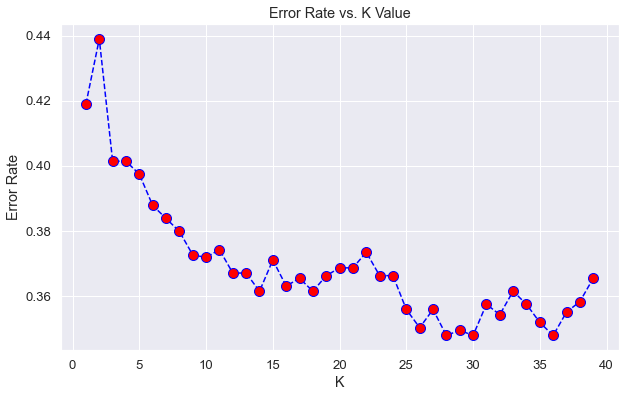

In [84]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [85]:
error_rate.index(min(error_rate))

27

In [86]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[311  91  32]
 [ 82 166 140]
 [ 32 148 251]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       434
           1       0.41      0.43      0.42       388
           2       0.59      0.58      0.59       431

    accuracy                           0.58      1253
   macro avg       0.58      0.58      0.58      1253
weighted avg       0.58      0.58      0.58      1253



In [177]:
# NOW WITH K=27
knn = KNeighborsClassifier(n_neighbors=27)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=27')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=27


[[344  74  16]
 [ 91 183 114]
 [ 38 113 280]]


              precision    recall  f1-score   support

           0       0.73      0.79      0.76       434
           1       0.49      0.47      0.48       388
           2       0.68      0.65      0.67       431

    accuracy                           0.64      1253
   macro avg       0.63      0.64      0.64      1253
weighted avg       0.64      0.64      0.64      1253



##  Conclusion: From all of this models svc had the best accuracy 68%

# What I changed
## 1. Added new graphes to get new insights
## 2. Classes by age: young, middle, old